## In this assignment, we gonna implement Histogram Back Projection to detect an object in a target image/video.

We have inputs: 

 - ROI image (small one that can be skin/flower/ball/pattern patch)

 - Target Image (or video) (large one)

and output:

 - Output image with ROI region highlighted in target one.

### Assignment 1: Implement ROI detection using Histogram Back Pojection manually

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

#import images
target = cv.imread('./resources/roses.png')
roi = cv.imread('./resources/roi.png')

#convert original color space (BGR) to HSV color space 
target_hsv = cv.cvtColor(target, cv.COLOR_BGR2HSV)
roi_hsv = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

#calculate color histogram of target image
target_hist = cv.calcHist([target_hsv], [0,1], None, [180, 256], [0, 180, 0, 256])
#calculate color histogram of ROI image
roi_hist = cv.calcHist([roi_hsv], [0,1], None, [180, 256], [0, 180, 0, 256])

#calculate ratio of roi to target
r = roi_hist/(target_hist + 0.01)

# Normalize r to range [0, 255]
r_normalized = r / np.max(r) * 255

# Create back projection image manually
height, width = target_hsv.shape[:2]
B = np.zeros((height, width), dtype=np.uint8)

# Extract hue and saturation channels
h, s, v = cv.split(target_hsv)

# Manually create back projection
for y in range(height):
    for x in range(width):
        hue_val = h[y, x]
        sat_val = s[y, x]
        # Use ratio value from histogram ratio matrix
        B[y, x] = r_normalized[hue_val, sat_val]

# Apply filtering to improve results (simple Gaussian blur)
B = cv.GaussianBlur(B, (5, 5), 0)

# Threshold to create binary mask
_, thresh = cv.threshold(B, 10, 255, cv.THRESH_BINARY)

# Apply simple morphological operations
kernel = np.ones((5, 5), np.uint8)
thresh = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)
thresh = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

# Find contours manually (could also use OpenCV's function here)
# But for simplicity, we'll use OpenCV's findContours
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Create result image
result = target.copy()

# Draw contours
for contour in contours:
    # Filter small contours (noise)
    if cv.contourArea(contour) > 100:
        cv.drawContours(result, [contour], -1, (0, 255, 0), 2)

# Convert BGR to RGB for displaying with matplotlib
target_rgb = cv.cvtColor(target, cv.COLOR_BGR2RGB)
roi_rgb = cv.cvtColor(roi, cv.COLOR_BGR2RGB)
result_rgb = cv.cvtColor(result, cv.COLOR_BGR2RGB)

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Target Image')
plt.imshow(target_rgb)

plt.subplot(2, 2, 2)
plt.title('ROI Image')
plt.imshow(roi_rgb)

plt.subplot(2, 2, 3)
plt.title('Back Projection (Manual)')
plt.imshow(B, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Result: ROI Detected')
plt.imshow(result_rgb)

plt.tight_layout()
plt.show()


### Assignment 2: Using cv2 function


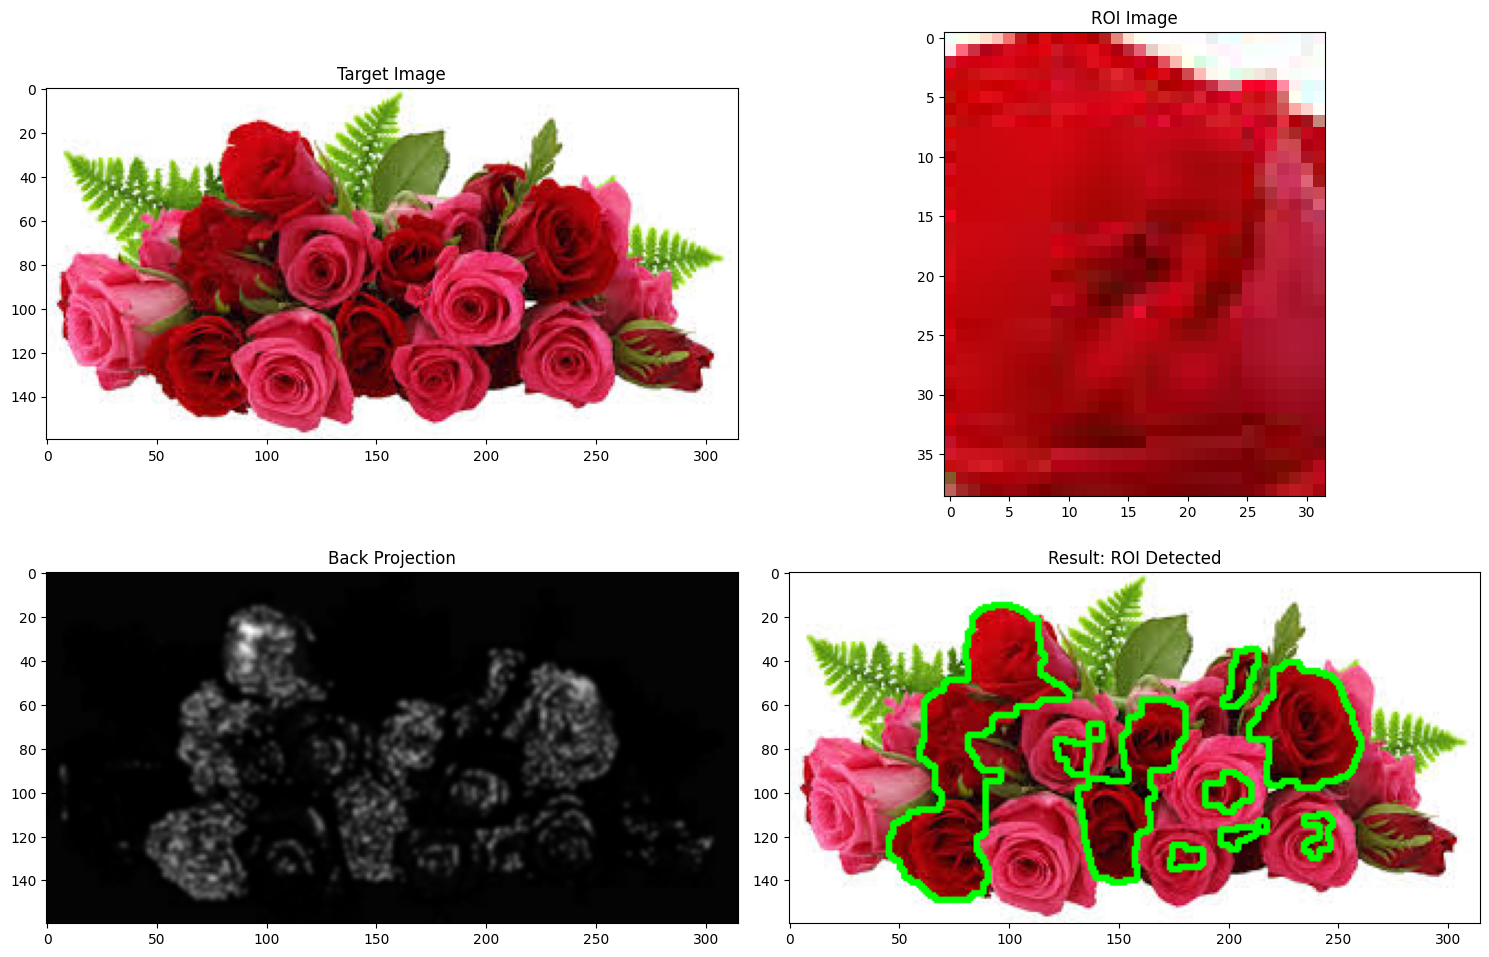

In [43]:
#normalize histogram of roi image
roi_hist_normalized = cv.normalize(roi_hist, None, 0, 255, cv.NORM_MINMAX)

# Apply back projection
B = cv.calcBackProject([target_hsv], [0, 1], roi_hist_normalized, [0, 180, 0, 256], 1)

# Apply filtering to improve results (simple Gaussian blur)
B = cv.GaussianBlur(B, (5, 5), 0)

# Threshold the back projection
_, thresh = cv.threshold(B, 10, 255, cv.THRESH_BINARY)

# Apply morphological operations to clean up the result
kernel = np.ones((5, 5), np.uint8)
thresh = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)
thresh = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

# Find contours in the thresholded image
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Create a result image for visualization
result = target.copy()

# Draw contours on the result image, filtering small ones
for contour in contours:
    if cv.contourArea(contour) > 100:  # Filter small contours
        cv.drawContours(result, [contour], -1, (0, 255, 0), 2)

# Convert BGR to RGB for displaying with matplotlib
target_rgb = cv.cvtColor(target, cv.COLOR_BGR2RGB)
roi_rgb = cv.cvtColor(roi, cv.COLOR_BGR2RGB)
result_rgb = cv.cvtColor(result, cv.COLOR_BGR2RGB)

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Target Image')
plt.imshow(target_rgb)

plt.subplot(2, 2, 2)
plt.title('ROI Image')
plt.imshow(roi_rgb)

plt.subplot(2, 2, 3)
plt.title('Back Projection')
plt.imshow(B, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Result: ROI Detected')
plt.imshow(result_rgb)

plt.tight_layout()
plt.show()